# Intensive Module in Machine Learning
# Problem set 5: Tree based models

If you are looking at the pdf/html version of this document, start by running the command `jupyter notebook` to launch an interactive notebook and then navigate to the correct folder and open this file `problem-set-5.ipynb`. Import your default packages for manipulating data and plotting:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

## 1. Regression and classification trees

## 1.1 Regression trees

For this exercise we use the Housing Data as you are already familiar with it

a) Split the data in training and test data and fit a regression tree.

In [2]:
np.seed = 2000
data = pd.read_csv('California-Housing.txt', sep=",")
mask = np.random.rand(len(data)) < 0.8
train = data[mask]
test = data[~mask]
X = train.iloc[:,1:]
y = train['MedianHouseValue']
X_test = test.iloc[:,1:]
y_test = test['MedianHouseValue']

In [3]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X,y)
regressor.score(X,y)
print(regressor.score(X_test,y_test))


0.5368912825764509


b) Perform cross-validation to determine the optimal size of the tree.

In [4]:
#Let's first see how deep the fitted unrestricted tree above is, to get a feeling of how deep we should go for the
#crossvalidation
print(regressor.tree_.max_depth)

37


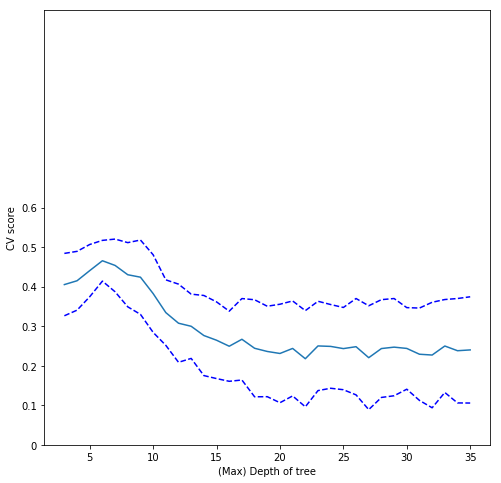

In [5]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeRegressor()
depths = np.linspace(3, 35, 33)  

scores = list()
scores_std = list()
for d in depths:
    tree.max_depth = d
    this_scores = cross_val_score(tree, X, y, cv=5)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Let's plot the outcome of our CV
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.plot(depths, scores)
plt.plot(depths, np.array(scores) + np.array(scores_std), 'b--')
plt.plot(depths, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('(Max) Depth of tree')
plt.ylim(0, 1.1)
plt.show()

<span style="color:blue"> The optimal tree depth looks to be 5 or 6. Lets verify that: </span>

In [7]:
index = np.argmax(scores)
print(depths[index])

6.0


## 1.2 Classification tree on the Heart Data 

Here we use a new data set, the Heart Data. The data has 303 observations. The response variable is AHD, heart disease, yes or no. There are 13 predictors include factors such as Sex, Age etc.

a) Load and inspect the data. Split the data in train and test set.

In [8]:
data2 = pd.read_csv('Heart.csv', sep=",",index_col = 0)
#Let's check for NaNs
data2.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [9]:
data2 = data2.dropna()
#Next, look at the data
data2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


<span style="color:blue">To fit tree based models using sklearn, we need to transform the categorial features "ChestPain" and "Thal" as well the labels in "AHD" into numerical values. For the labels, this can be done simply by using the LabelEncoder function which transforms "yes" and "no" to 1 and 0. For the categorial features we however want to avoid any ordering among the categories, as would be implied by using the LabelEncoder function to transform the strings to values 0,1,2,... Therefore we need to introduce dummy variables as can be easily done using the pandas get_dummies function. </span>

In [10]:
from sklearn import preprocessing

#First, transform response variable AHD to 0-1 encoded class labels
le = preprocessing.LabelEncoder()
le.fit(data2['AHD'])
data2['AHD'] = le.transform(data2['AHD']) 
#Next, transform the 2 feature columns with string values to one-hot-encoded values
data2 = pd.get_dummies(data2,prefix=['ChestPain','Thal'])
#Finally, move 0-1 encoded AHD column to front so we can isolate feature columns easily
cols = list(data2)
cols.insert(0, cols.pop(cols.index('AHD')))
data2 = data2.loc[:, cols]

In [11]:
mask2 = np.random.rand(len(data2)) < 0.8
train2 = data2[mask2]
test2 = data2[~mask2]

X2 = train2.iloc[:,1:]
y2 = train2['AHD']
X2_test = test2.iloc[:,1:]
y2_test = test2['AHD']

b) Train a classification tree on the data.

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree2 = DecisionTreeClassifier()
tree2.fit(X2,y2)
tree2.score(X2,y2)

1.0

c) Perform cross-validation to determine the optimal size of the tree.

In [13]:
#Let's first see how deep the fitted unrestricted tree above is, to get a feeling of how deep we should go for the
#crossvalidation
print(tree2.tree_.max_depth)

10


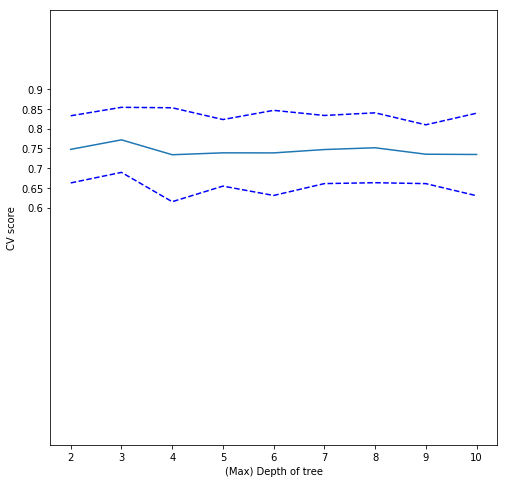

In [14]:
tree = DecisionTreeClassifier()
depths = np.linspace(2, 10, 9)  

scores = list()
scores_std = list()
for d in depths:
    tree.max_depth = d
    this_scores = cross_val_score(tree, X2, y2, cv=10)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Let's plot the outcome of our CV
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.plot(depths, scores)
plt.plot(depths, np.array(scores) + np.array(scores_std), 'b--')
plt.plot(depths, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('(Max) Depth of tree')
plt.ylim(0, 1.1)
plt.show()

c) For your best model, produce a ROC curve.

<span style="color:blue"> 3 looks like the best choice of depth actually, so we fit that model again and plot the ROC curve </span>

0.33333333333333337


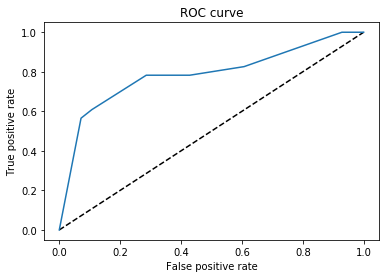

In [15]:
#Train tree again with depth 3
tree.max_depth = 3
tree.fit(X2,y2)
print(1.0-tree.score(X2_test,y2_test))
#Let's look at the ROC curve for the test data
from sklearn.metrics import roc_curve

y_pred = tree.predict_proba(X2_test)[:, 1]
fpr, tpr, _ = roc_curve(y2_test, y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# 2. Ensemble based methods

## 2.1 Boosting

Boosting is one of the most popular methods for Data Scientists.

a) To get started, train a boosting model on the Housing Data.

In [16]:
from sklearn import ensemble
model = ensemble.GradientBoostingRegressor()
model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

b) Boosting has various hyper-parameters such as the size of the individual trees (which is usually chosen quite small) and the learning rate. Perfom a basic cross-validation to determine a good model fit.

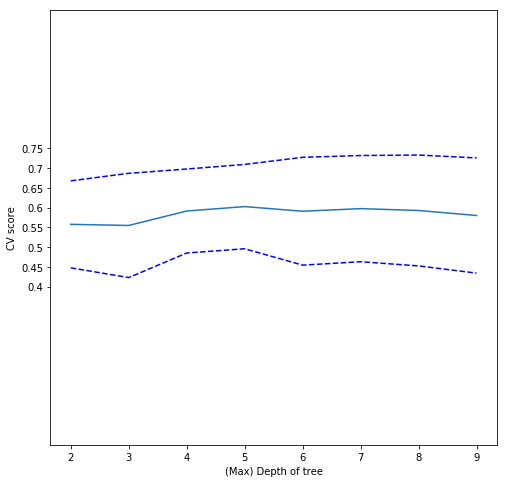

In [17]:
depths = np.linspace(2, 9, 8)
learning_rates = [0.01, 0.1, 1]

scores = np.zeros(len(depths))
scores_std = np.zeros(len(depths))
learning_rate = np.zeros(len(depths))

for ii in range(0,len(depths)):
    model.max_depth = depths[ii]
    best_score = 0.0
    for l in learning_rates:
        model.learning_rate = l
        this_scores = cross_val_score(model, X, y, cv=10)
        if np.mean(this_scores) > best_score:
            best_score = np.mean(this_scores)
            scores[ii] = np.mean(this_scores)
            scores_std[ii] = np.std(this_scores)
            learning_rate[ii] = l

# Let's plot the outcome of our CV
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.plot(depths, scores)
plt.plot(depths, np.array(scores) + np.array(scores_std), 'b--')
plt.plot(depths, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('(Max) Depth of tree')
plt.ylim(0, 1.1)
plt.show()

c) Compare the models accuracy with that of the regression tree from exercise 1. 

<span style="color:blue"> Optimal value seems to be 5 or 6. Let's verify that.</span> 

In [18]:
index = np.argmax(scores)
print(depths[index])

5.0


<span style="color:blue">  Let's fit the model with these optimal parameters and look at the score. </span> 

In [19]:
learn_rate = learning_rate[index]
model.learning_rate = learn_rate
model.max_depth = depths[index]
model.fit(X,y)
print(model.score(X_test,y_test))

0.7916506764023983


## 2.2 Comaring different ensemble methods

For this exercise we go back to the Heart Data.

a) Fit a bagging model, a random forest and a boosting model on the data. Use the same train and test data as above.

In [29]:
bag = ensemble.BaggingClassifier()
rf = ensemble.RandomForestClassifier()
boost = ensemble.GradientBoostingClassifier()

bag.fit(X2, y2)
rf.fit(X2, y2)
boost.fit(X2, y2)

print(bag.score(X2_test,y2_test))
print(rf.score(X2_test,y2_test))
print(boost.score(X2_test,y2_test))

0.7647058823529411
0.8235294117647058
0.8431372549019608


b) Compare the performance of the different models as a function of the number of trees. The final comparison should look something like this.

![](heart-res.png)

In [41]:
#First creat cross-validation set out of training set to be used for training with lightgbm package
mask3 = np.random.rand(len(train2)) < 0.8
cv3 = train2[~mask3]
train3 = train2[mask3]

X2_train = train3.iloc[:,1:]
y2_train = train3['AHD']
X2_cv = cv3.iloc[:,1:]
y2_cv = cv3['AHD']


#Import the lightgbm package
import lightgbm

categorical_features = [c for c, col in enumerate(X2.columns) if 'cat' in col]
train_data = lightgbm.Dataset(X2_train, label=y2_train)
validation_data = lightgbm.Dataset(X2_cv, label=y2_cv)
test_data = lightgbm.Dataset(X2_test, label=y2_test)

scores_bag = list()
scores_rf = list()
scores_boost = list()

treenumbers = np.linspace(1,3961,100)

for nn in treenumbers:    
    #Adjust maximum number of trees for each model 
    bag.n_estimators = int(nn)
    rf.n_estimators = int(nn)
    boost_parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'num_trees':int(nn),
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
    }
    #Fit the model with new maximum number of trees
    bag.fit(X2,y2)
    rf.fit(X2,y2)
    model = lightgbm.train(parameters,train_data,valid_sets=validation_data,num_boost_round=5000,early_stopping_rounds=100)
    #Append test set accuracy to score vector for each model
    scores_bag.append(bag.score(X2_test,y2_test))
    scores_rf.append(rf.score(X2_test,y2_test))
    ypred = model.predict(X2_test)
    ypred[ypred > 0.5] = 1
    ypred[ypred <= 0.5] = 0
    scores_boost.append(np.mean(np.equal(ypred, y2_test)))


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1]	valid_0's auc: 0.766923
1.0
[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	val

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]

321.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

361.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

401.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

441.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

481.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

[281]	valid_0's auc: 0.947692
[282]	valid_0's auc: 0.947692
[283]	valid_0's auc: 0.944615
[284]	valid_0's auc: 0.944615
[285]	valid_0's auc: 0.944615
[286]	valid_0's auc: 0.946154
[287]	valid_0's auc: 0.943077
[288]	valid_0's auc: 0.941538
[289]	valid_0's auc: 0.944615
[290]	valid_0's auc: 0.946154
[291]	valid_0's auc: 0.947692
Early stopping, best iteration is:
[191]	valid_0's auc: 0.949231
521.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

[286]	valid_0's auc: 0.946154
[287]	valid_0's auc: 0.943077
[288]	valid_0's auc: 0.941538
[289]	valid_0's auc: 0.944615
[290]	valid_0's auc: 0.946154
[291]	valid_0's auc: 0.947692
Early stopping, best iteration is:
[191]	valid_0's auc: 0.949231
601.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

[281]	valid_0's auc: 0.947692
[282]	valid_0's auc: 0.947692
[283]	valid_0's auc: 0.944615
[284]	valid_0's auc: 0.944615
[285]	valid_0's auc: 0.944615
[286]	valid_0's auc: 0.946154
[287]	valid_0's auc: 0.943077
[288]	valid_0's auc: 0.941538
[289]	valid_0's auc: 0.944615
[290]	valid_0's auc: 0.946154
[291]	valid_0's auc: 0.947692
Early stopping, best iteration is:
[191]	valid_0's auc: 0.949231
641.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

681.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

721.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

761.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

801.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

921.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

961.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1001.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1041.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1081.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1121.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1161.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1201.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

[287]	valid_0's auc: 0.943077
[288]	valid_0's auc: 0.941538
[289]	valid_0's auc: 0.944615
[290]	valid_0's auc: 0.946154
[291]	valid_0's auc: 0.947692
Early stopping, best iteration is:
[191]	valid_0's auc: 0.949231
1281.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1321.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1361.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1401.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1441.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1481.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1521.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1561.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1601.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1641.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1681.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1721.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1761.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1801.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1841.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1881.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1921.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

1961.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2001.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2041.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2081.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2121.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2161.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2201.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2241.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2281.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2321.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2361.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2401.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2441.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2481.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

[279]	valid_0's auc: 0.946154
[280]	valid_0's auc: 0.947692
[281]	valid_0's auc: 0.947692
[282]	valid_0's auc: 0.947692
[283]	valid_0's auc: 0.944615
[284]	valid_0's auc: 0.944615
[285]	valid_0's auc: 0.944615
[286]	valid_0's auc: 0.946154
[287]	valid_0's auc: 0.943077
[288]	valid_0's auc: 0.941538
[289]	valid_0's auc: 0.944615
[290]	valid_0's auc: 0.946154
[291]	valid_0's auc: 0.947692
Early stopping, best iteration is:
[191]	valid_0's auc: 0.949231
2521.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2561.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2601.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2641.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2681.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2721.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2761.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2801.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2841.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2881.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2921.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

2961.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3001.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3041.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3081.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3121.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3161.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

[288]	valid_0's auc: 0.941538
[289]	valid_0's auc: 0.944615
[290]	valid_0's auc: 0.946154
[291]	valid_0's auc: 0.947692
Early stopping, best iteration is:
[191]	valid_0's auc: 0.949231
3201.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3241.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3281.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3321.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3361.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3401.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3441.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3481.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3521.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3561.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3601.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3641.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3681.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

[286]	valid_0's auc: 0.946154
[287]	valid_0's auc: 0.943077
[288]	valid_0's auc: 0.941538
[289]	valid_0's auc: 0.944615
[290]	valid_0's auc: 0.946154
[291]	valid_0's auc: 0.947692
Early stopping, best iteration is:
[191]	valid_0's auc: 0.949231
3721.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

[280]	valid_0's auc: 0.947692
[281]	valid_0's auc: 0.947692
[282]	valid_0's auc: 0.947692
[283]	valid_0's auc: 0.944615
[284]	valid_0's auc: 0.944615
[285]	valid_0's auc: 0.944615
[286]	valid_0's auc: 0.946154
[287]	valid_0's auc: 0.943077
[288]	valid_0's auc: 0.941538
[289]	valid_0's auc: 0.944615
[290]	valid_0's auc: 0.946154
[291]	valid_0's auc: 0.947692
Early stopping, best iteration is:
[191]	valid_0's auc: 0.949231
3761.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3801.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3841.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3881.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3921.0


/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.766923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.913846
[3]	valid_0's auc: 0.908462
[4]	valid_0's auc: 0.896154
[5]	valid_0's auc: 0.893077
[6]	valid_0's auc: 0.899231
[7]	valid_0's auc: 0.896154
[8]	valid_0's auc: 0.894615
[9]	valid_0's auc: 0.883846
[10]	valid_0's auc: 0.89
[11]	valid_0's auc: 0.885385
[12]	valid_0's auc: 0.879231
[13]	valid_0's auc: 0.876923
[14]	valid_0's auc: 0.873846
[15]	valid_0's auc: 0.872308
[16]	valid_0's auc: 0.873846
[17]	valid_0's auc: 0.873846
[18]	valid_0's auc: 0.876923
[19]	valid_0's auc: 0.88
[20]	valid_0's auc: 0.872308
[21]	valid_0's auc: 0.875385
[22]	valid_0's auc: 0.88
[23]	valid_0's auc: 0.884615
[24]	valid_0's auc: 0.88
[25]	valid_0's auc: 0.887692
[26]	valid_0's auc: 0.890769
[27]	valid_0's auc: 0.895385
[28]	valid_0's auc: 0.889231
[29]	valid_0's auc: 0.892308
[30]	valid_0's auc: 0.890769
[31]	valid_0's auc: 0.892308
[32]	valid_0's auc: 0.895385
[33]	valid_0's auc: 0.901538
[34]	

3961.0


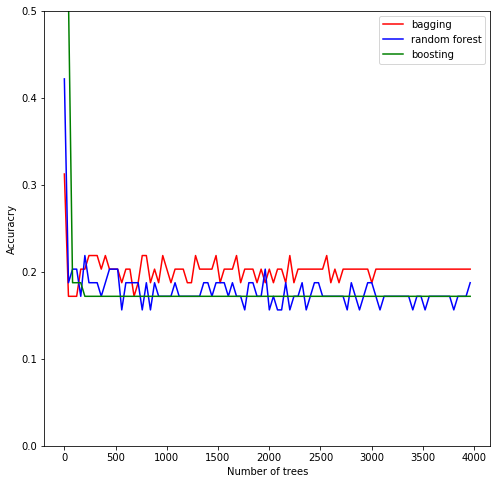

In [42]:
#Plot the results, also in comparison to single tree "baseline"
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.plot(treenumbers,(1.0-tree.score(X2_test,y2_test))*np.ones(len(treenumbers)),'b--', label='tree')
plt.plot(treenumbers,1.0-np.array(scores_bag),'r',label='bagging')
plt.plot(treenumbers,1.0-np.array(scores_rf),'b',label='random forest')
plt.plot(treenumbers,1.0-np.array(scores_boost),'g',label='boosting')
plt.ylabel('Accuracry')
plt.xlabel('Number of trees')
plt.ylim(0, 0.5)
plt.legend()
plt.show()  